In [2]:
import yfinance as yf
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Stockprice

In [3]:
# Volkswagen
vw_stock = yf.download('VOW3.DE', start='2017-01-01', end='2025-01-16')
vw_stock = vw_stock['Close']

# Porsche
porsche_stock = yf.download('PAH3.DE', start='2017-01-01', end='2025-01-16')
porsche_stock = porsche_stock['Close']

# BMW
bmw_stock = yf.download('BMW.DE', start='2017-01-01', end='2025-01-16')
bmw_stock = bmw_stock['Close']

# Mercedes
mercedes_stock = yf.download('MBG.DE', start='2017-01-01', end='2025-01-16')
mercedes_stock= mercedes_stock['Close']

# Stellantis
stellantis_stock = yf.download('STLAM.MI', start='2017-01-01', end='2025-01-16')
stellantis_stock= stellantis_stock['Close']

# Tesla
tesla_stock = yf.download('TSLA', start='2017-01-01', end='2025-01-16')
tesla_stock = tesla_stock['Close']

# BYD
byd_stock = yf.download('BYDDF', start='2017-01-01', end='2025-01-16')
byd_stock = byd_stock['Close']

# Toyota
toyota_stock = yf.download('TM', start='2017-01-01', end='2025-01-16')
toyota_stock = toyota_stock['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
all_stock_prices = pd.concat([vw_stock, mercedes_stock, porsche_stock, stellantis_stock, bmw_stock, tesla_stock, byd_stock, toyota_stock], axis=1)
all_stock_prices.columns = ['Volkswagen', 'Mercedes', 'Porsche', 'Stellantis', 'BMW', 'Tesla', 'BYD', 'Toyota']
all_stock_prices = all_stock_prices.bfill()
#all_stock_prices

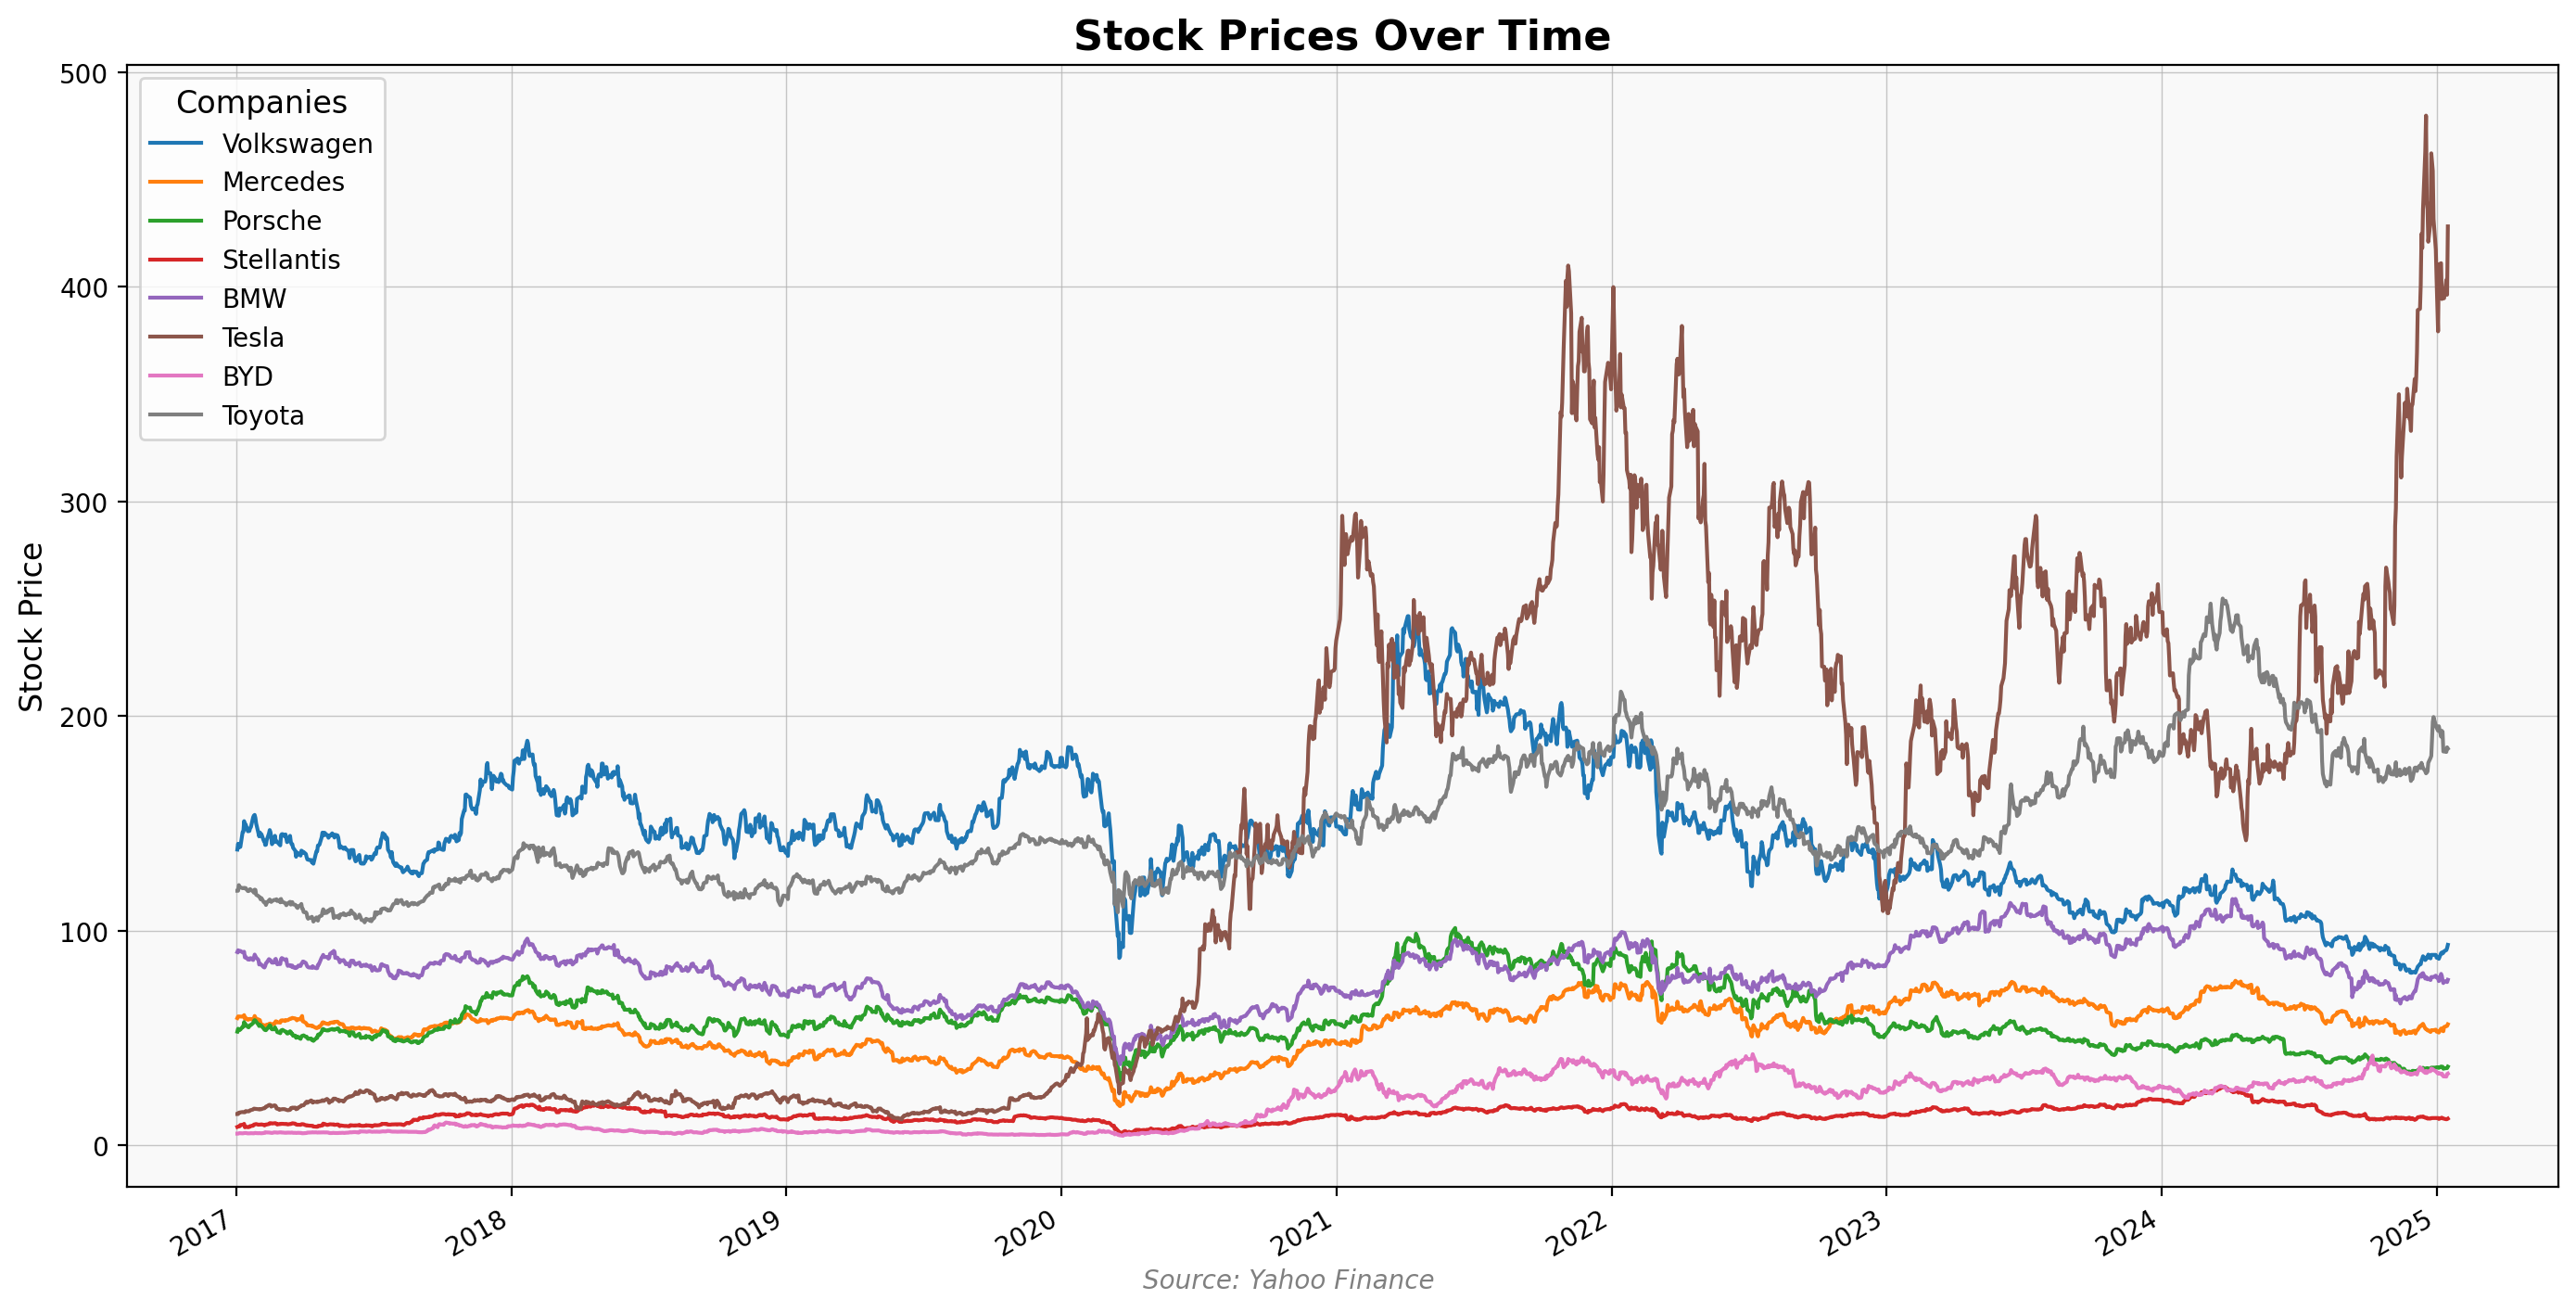

In [5]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=200)

all_stock_prices.plot(ax=ax, legend=False)

# labels
ax.set_title('Stock Prices Over Time', fontsize=16, weight='bold')
ax.set_ylabel('Stock Price', fontsize=12)
ax.set_xlabel('', fontsize=12)

ax.legend(title='Companies', title_fontsize=12, fontsize=10, loc='upper left')
fig.text(0.5, 0.00, 'Source: Yahoo Finance', ha='center', fontsize=10, color='gray', style='italic')

# Add gridlines
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax.grid(visible=True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)

# Color
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


In [6]:
# Normalized Prices
base_prices = all_stock_prices.loc['2017-01-02']
normalized_prices = (all_stock_prices / base_prices) * 100
#normalized_prices

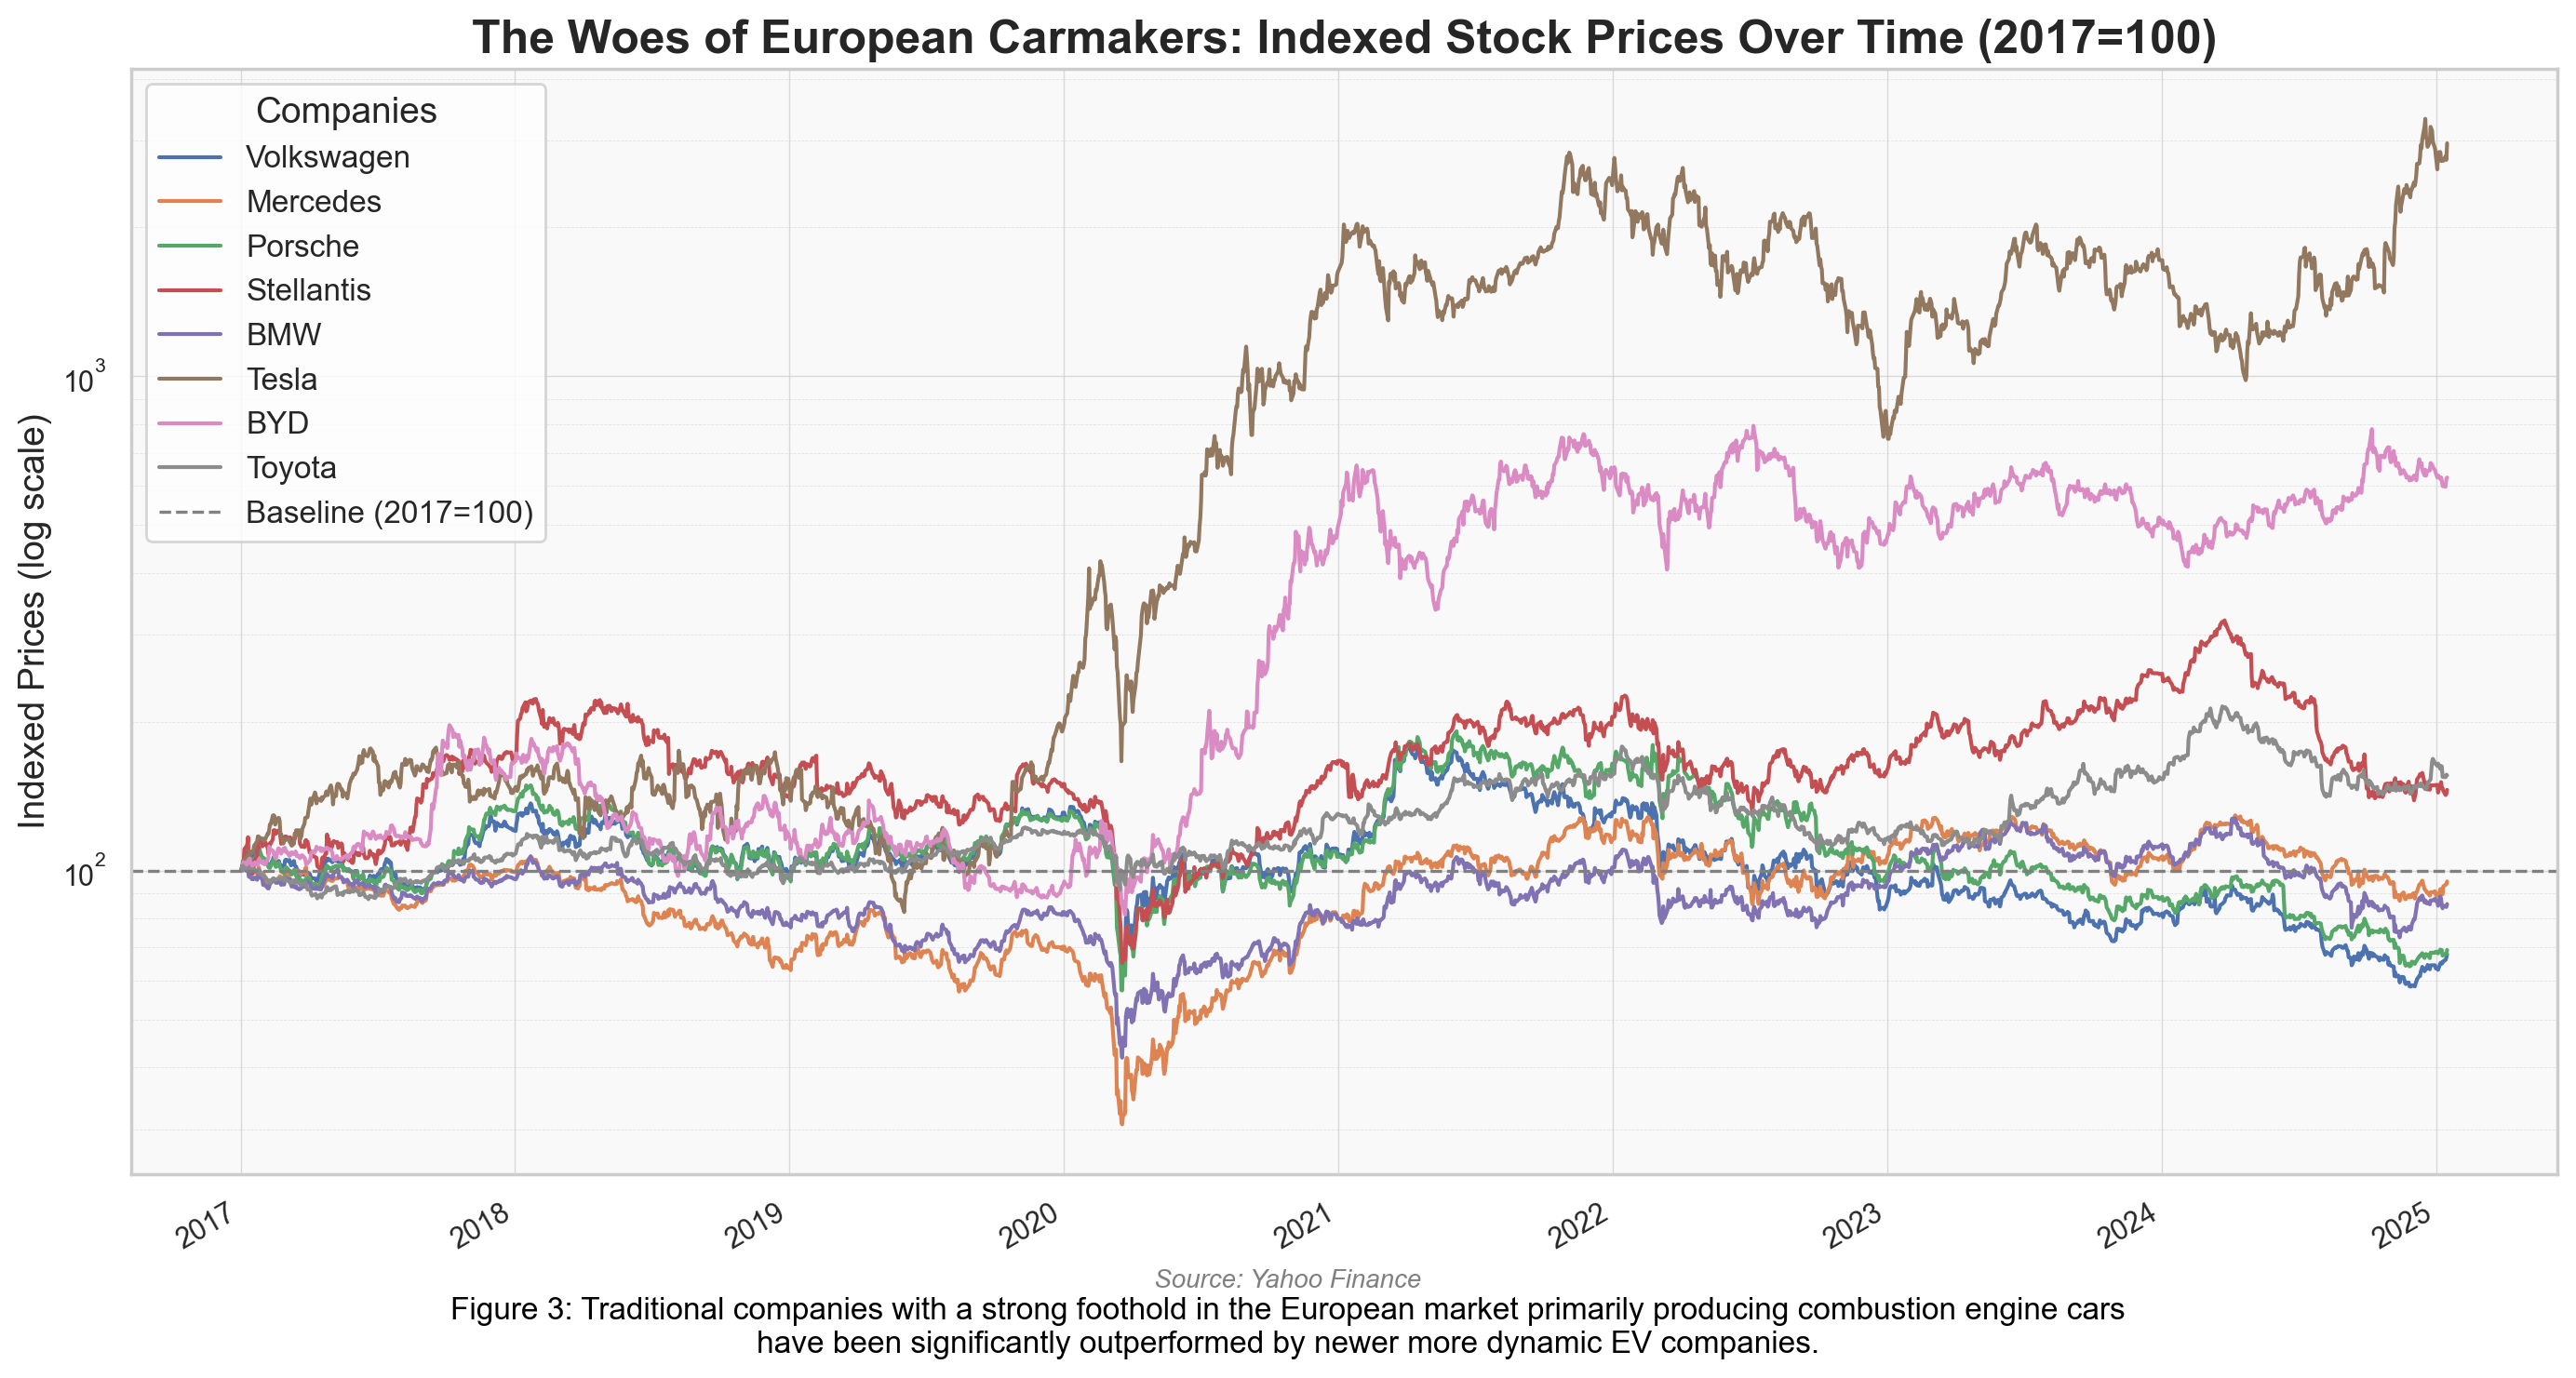

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 7), dpi=200)
normalized_prices.plot(ax=ax, logy=True, legend=False)

ax.axhline(y=100, color='gray', linestyle='--', linewidth=1.2, label='Baseline (2017=100)')

ax.set_title('The Woes of European Carmakers: Indexed Stock Prices Over Time (2017=100)', fontsize=18, weight='bold')
ax.set_ylabel('Indexed Prices (log scale)', fontsize=14)
ax.set_xlabel('', fontsize=14)

ax.legend(title='Companies', title_fontsize=14, fontsize=12, loc='upper left')
fig.text(0.5, 0.00, 'Source: Yahoo Finance', ha='center', fontsize=10, color='gray', style='italic')

ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax.grid(visible=True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)

ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('white')

fig.text(0.5, -0.05, 'Figure 3: Traditional companies with a strong foothold in the European market primarily producing combustion engine cars\nhave been significantly outperformed by newer more dynamic EV companies.', ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()